In [1]:
import numpy as np
import pylab
import pandas as pd
from sklearn.preprocessing import StandardScaler
import time


from tsne import TSNE

from contrastive_loss import ContrastiveLoss
#from sklearn.manifold import TSNE as STSNE

In [2]:
tsne = TSNE()

In [3]:

def get_Data():
    penguins = pd.read_csv("https://github.com/allisonhorst/palmerpenguins/raw/5b5891f01b52ae26ad8cb9755ec93672f49328a8/data/penguins_size.csv")
    penguins = penguins.dropna()
    penguin_data = penguins[
    [
        "species_short",
        "culmen_length_mm",
        "culmen_depth_mm",
        "flipper_length_mm",
        "body_mass_g",
    ]
    ].values
    
    for i in range(len(penguin_data)):
        name = penguin_data[i][0]
        if name == 'Adelie':
            penguin_data[i][0] = 1
        elif name == 'Chinstrap':
            penguin_data[i][0] = 2
        else: 
            penguin_data[i][0] = 3
            
    train, test = splitData(penguin_data)
    
    train_data = [data[1:] for data in train]
    train_data = StandardScaler().fit_transform(train_data)
    test_data = [data[1:] for data in test]
    test_data = StandardScaler().fit_transform(test_data)
    train_label = [data[0] for data in train]
    test_label = [data[0] for data in test]
    return train_data, train_label, test_data, test_label



In [4]:
def splitData(data):
    np.random.shuffle(data)
    split = int(len(data)*0.8)
    train, test = np.split(data, [split])
    return train, test
    

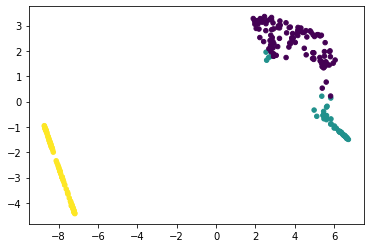

33718.949765750054


In [7]:
train_data, train_label, test_data, test_label = get_Data()
#plot(train_data, train_label, 48.19660112501052, 7.294308566870952, 0.41114561800016824, 100)
plot(train_data, train_label, 30, 4, 0.65, 200)

In [5]:
def plot(data, label, p, e, m, i):
    Y = tsne.tsne(data, dims = 2, perplexity = p, exageration = e, momentum = m, iterations = i)
    pylab.scatter(Y[:, 0], Y[:, 1], s=20, c=label)
    pylab.show()
    loss = ContrastiveLoss(5)
    print(loss.get_loss(Y, label))

0


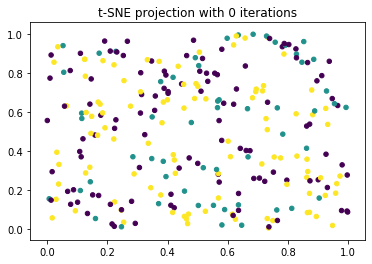

4
8
12
16
20
24
28
32
36
40
44
48
52
56
60
64
68
72
76


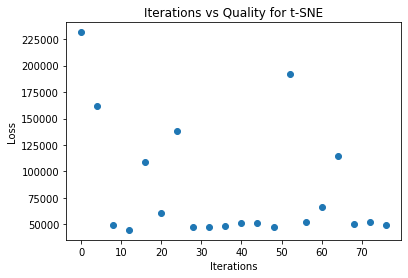

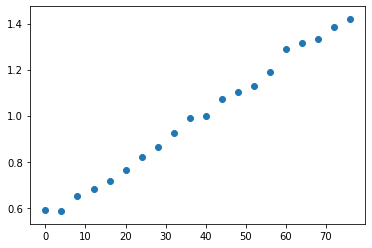

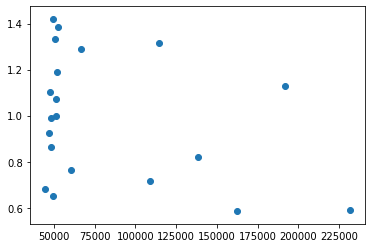

In [12]:
train_data, train_label, test_data, test_label = get_Data()
test_iterations(train_data, train_label, 20, 4, 0.5)


In [5]:
def test_iterations(data, label, p, e, m):
    loss = ContrastiveLoss(5)
    all_quality = []
    all_i = []
    all_time = []
    for i in range(0, 80, 4):
        print(i)
        start = time.time()
        #Y = STSNE(n_components=2, learning_rate='auto', init='random').fit_transform(data)
        Y = tsne.tsne(data, dims = 2, perplexity = p, exageration = e, momentum = m, iterations = i)
        end = time.time()
        losses = loss.get_loss(Y, label)
        all_quality.append(losses)
        all_i.append(i)
        all_time.append(end-start)
        if i % 50 == 0:
            pylab.title(f"t-SNE projection with {i} iterations")
            pylab.scatter(Y[:, 0], Y[:, 1], s=20, c=label)
            pylab.show()
    pylab.title("Iterations vs Quality for t-SNE") 
    pylab.xlabel("Iterations")
    pylab.ylabel("Loss")
    pylab.scatter(all_i, all_quality)
    pylab.show()
    pylab.scatter(all_i, all_time)
    pylab.show()
    pylab.scatter(all_quality, all_time)
    pylab.show()

In [7]:
def average_score(data, label, p, e, m, i):
    loss = ContrastiveLoss()
    sum_score = 0
    for n in range(10):
        Y = tsne.tsne(data, dims = 2, perplexity = p, exageration = e, momentum = m, iterations = i)
        pylab.scatter(Y[:, 0], Y[:, 1], s=20, c=label)
        pylab.show()
        sum_score += loss.get_loss(Y, label)
    sum_score /= 10
    return sum_score

In [8]:
def score_test(test_data, test_label, p, e, m, itera):
    loss = ContrastiveLoss(5)
    sum_score = 0
    sum_time = 0
    s = time.time()
    Y = tsne.tsne(test_data, dims = 2, perplexity = p, exageration = e, momentum = m, iterations = itera)
    e = time.time()
    pylab.scatter(Y[:, 0], Y[:, 1], s=20, c=test_label)
    pylab.show()
    sum_time += e-s
    now_score = loss.get_loss(Y, test_label)
    #print(now_score)
    sum_score += now_score
    return sum_score, sum_time

27500.76699804157
35.83592135001262 4.379453511879784 0.65 100


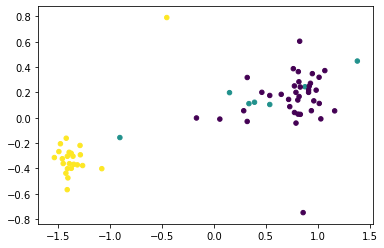

6886.850019224871 0.2710142135620117


In [65]:
print(score)
#print(average_score(train_data, train_label, perplexity, exageration,  momentum, iteration))
print(perplexity, exageration, momentum, iteration)
avg_score, avg_time = score_test(test_data, test_label, perplexity, exageration,  momentum, iteration)
print(avg_score, avg_time)

In [14]:
train_data, train_label, test_data, test_label = get_Data()
perplexity, exageration, momentum, iteration, score = get_best(train_data, train_label)

30 9901297.263589446
4 10403832.084752679
0.65 5364212.796385839

41.67184270002524 4966082.339885309
4 4661137.369338863
0.2944271909999159 4815292.135842041

40.820393249936906 4838716.042240393
6.031929354378312 4770291.475550089


KeyboardInterrupt: 

In [9]:
def get_best(data, label):
    score = np.inf
    n_score = 0
    iterations = 100
    tol = 100
    
    perplexity = 30
    exageration = 4
    momentum = 0.65
    while abs(score - n_score) > tol:
        n_score = score
        p, n = get_best_perplexity(data, label, exageration, momentum, iterations)
        print(perplexity, n)
        if n < score:
            score = n
            perplexity = p 
        
        e, n = get_best_exageration(data, label, perplexity, momentum, iterations)
        print(exageration, n)
        if n < score:
            score = n
            exageration = e
        
        m, n = get_best_momentum(data, label, perplexity, exageration, iterations)
        print(momentum, n)
        if n < score:
            score = n
            momentum = m
        print()
    return perplexity, exageration, momentum, iterations, score
        

In [10]:
def get_best_perplexity(data, label, e, m, i):
    loss = ContrastiveLoss(5)
    a = 10
    b = 50
    gr = (np.sqrt(5)+1)/2
    tolerance = 3
    
    c = b - (b - a) / gr
    d = a + (b - a) / gr
    min_loss = 0
    count = 0
    while abs(b - a) > tolerance:
        #print(count, c, d)
        Y = tsne.tsne(data, dims = 2, perplexity = c, exageration = e, momentum = m, iterations = i)
        c_loss = loss.get_loss(Y, label)
        
        Y = tsne.tsne(data, dims = 2, perplexity = d, exageration = e, momentum = m, iterations = i)
        d_loss = loss.get_loss(Y, label)
        if c_loss < d_loss:
            b = d
            min_loss = c_loss
        else:
            a = c
            min_loss = d_loss
        c = b - (b - a) / gr
        d = a + (b - a) / gr
        count += 1
    return (b + a) / 2, min_loss

In [11]:
def get_best_exageration(data, label, p, m, i):
    loss = ContrastiveLoss(5)
    a = 1
    b = 8
    gr = (np.sqrt(5)+1)/2
    tolerance = 1
    
    c = b - (b - a) / gr
    d = a + (b - a) / gr
    min_loss = 0
    count = 0
    while abs(b - a) > tolerance:
        #print(count, c, d)
        Y = tsne.tsne(data, dims = 2, perplexity = p, exageration = c, momentum = m, iterations = i)
        c_loss = loss.get_loss(Y, label)
        
        Y = tsne.tsne(data, dims = 2, perplexity = p, exageration = d, momentum = m, iterations = i)
        d_loss = loss.get_loss(Y, label)
        if c_loss < d_loss:
            b = d
            min_loss = c_loss
        else:
            a = c
            min_loss = d_loss
        c = b - (b - a) / gr
        d = a + (b - a) / gr
        count += 1
    return (b + a) / 2, min_loss

In [12]:
def get_best_momentum(data, label, p, e, i):
    loss = ContrastiveLoss(5)
    a = 0.2
    b = 1
    gr = (np.sqrt(5)+1)/2
    tolerance = 0.05
    
    c = b - (b - a) / gr
    d = a + (b - a) / gr
    min_loss = 0
    count = 0
    while abs(b - a) > tolerance:
        #print(count, c, d)
        Y = tsne.tsne(data, dims = 2, perplexity = p, exageration = e, momentum = c, iterations = i)
        c_loss = loss.get_loss(Y, label)
        
        Y = tsne.tsne(data, dims = 2, perplexity = p, exageration = e, momentum = d, iterations = i)
        d_loss = loss.get_loss(Y, label)
        if c_loss < d_loss:
            b = d
            min_loss = c_loss
        else:
            a = c
            min_loss = d_loss
        c = b - (b - a) / gr
        d = a + (b - a) / gr
        count += 1
    return (b + a) / 2, min_loss

In [13]:
def perp_quality(data, label):
    all_quality = []
    all_perp = []
    all_time = []
    for i in range(20, 300, 20):
        print(i)
        start = time.time()
        Y = tsne.tsne(data, dims = 2, perplexity = i, exageration = 4, momentum = 0.65, iterations = 100)
        end = time.time()
        losses = loss.get_loss(Y, label)
        all_quality.append(losses)
        all_perp.append(i)
        all_time.append(end-start)
        if i == 20:
            pylab.title(f"t-SNE projection with {i} perplexity")
            pylab.scatter(Y[:, 0], Y[:, 1], s=20, c=label)
            pylab.show()
        if i % 60 == 0:
            pylab.title(f"t-SNE projection with {i} perplexity")
            pylab.scatter(Y[:, 0], Y[:, 1], s=20, c=label)
            pylab.show()
    pylab.title("Perplexity vs Quality for t-SNE") 
    pylab.xlabel("Perplexity")
    pylab.ylabel("Loss")
    pylab.scatter(all_perp, all_quality)
    pylab.show()
    pylab.scatter(all_perp, all_time)
    pylab.show()
    pylab.scatter(all_quality, all_time)
    pylab.show()

20


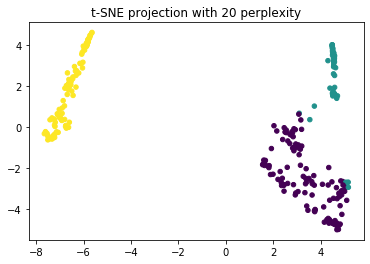

40
60


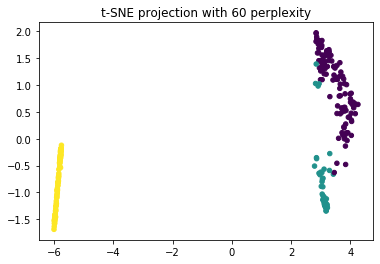

80
100
120


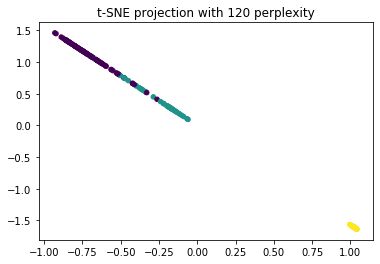

140
160
180


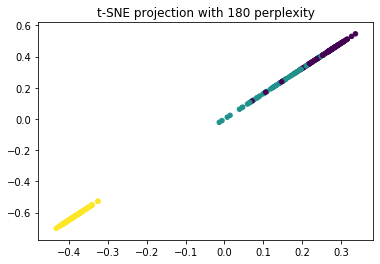

200
220
240


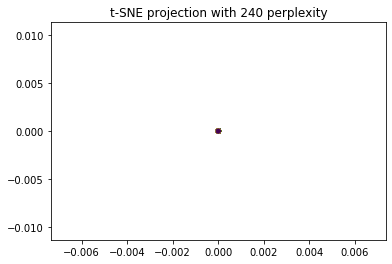

260
280


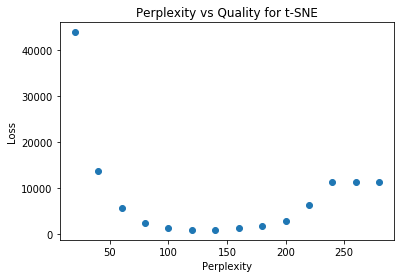

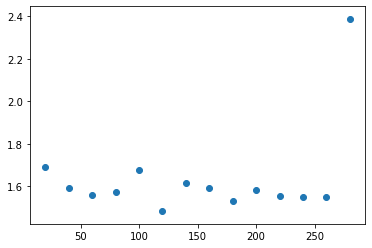

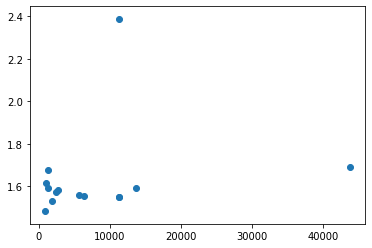

In [91]:
train_data, train_label, test_data, test_label = get_Data()
perp_quality(train_data, train_label)

In [23]:
loss = ContrastiveLoss()
X = scaled_penguin_data
all_quality = []
all_ex = []
all_time = []
for i in range(1, 10):
    print(i)
    start = time.time()
    Y = tsne.tsne(X, dims = 2, perplexity = 50, exageration = x, momentum = 0.8, iterations = 200)
    end = time.time()
    losses = loss.get_loss(Y, f_label)
    all_quality.append(losses)
    all_ex.append(x)
    all_time.append(end-start)
    #pylab.scatter(Y[:, 0], Y[:, 1], s=20, c=f_label)
    #pylab.show()
pylab.scatter(all_ex, all_quality)
pylab.show()
pylab.scatter(all_ex, all_time)
pylab.show()
pylab.scatter(all_quality, all_time)
pylab.show()

NameError: name 'scaled_penguin_data' is not defined